In [22]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: /Users/aqibr/Documents/GitHub/intro_to_python_project/src


In [23]:
jetbluenew_df = pd.read_csv('../data/jetbluenew_df.csv')
model_encoded = pd.read_csv('../data/model_encoded_jetblue_df.csv')


In [24]:
print(jetbluenew_df.head())
print(model_encoded.head())


   searchDate    route  flightDate startingAirport destinationAirport  \
0  2022-04-16  ATL|EWR  2022-04-17             ATL                EWR   
1  2022-04-16  ATL|JFK  2022-04-17             ATL                JFK   
2  2022-04-16  ATL|JFK  2022-04-17             ATL                JFK   
3  2022-04-16  ATL|LGA  2022-04-17             ATL                LGA   
4  2022-04-16  ATL|LGA  2022-04-17             ATL                LGA   

  travelDuration  elapsedDays  isBasicEconomy  isRefundable  isNonStop  ...  \
0         PT2H9M            0           False         False       True  ...   
1        PT2H15M            0           False         False       True  ...   
2        PT2H23M            0           False         False       True  ...   
3        PT2H16M            0           False         False       True  ...   
4        PT2H19M            0           False         False       True  ...   

   segmentsDepartureAirportCode  segmentsAirlineName  \
0                           AT

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

combined_df = pd.concat([jetbluenew_df, model_encoded], axis=1)

niche_encoding_filter = [
    "searchDayOfWeek", 
    "flightDayOfWeek", 
    "segmentsAirlineName"
]
combined_df.drop(columns=niche_encoding_filter, axis=1, inplace=True)

X = combined_df.select_dtypes(include=['number']).drop(columns=['totalFare'])  # Features
y = combined_df['totalFare']  # Target variable

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)









Model Performance:
Mean Squared Error (MSE): 2.2683261326994293
R-squared (R²): 0.9999104105342594

Feature Coefficients:
                                         Feature   Coefficient
9                     arrivalCategory_Late night  9.129323e+06
8                        arrivalCategory_Evening  9.129323e+06
6                      arrivalCategory_Afternoon  9.129323e+06
10                       arrivalCategory_Morning  9.129323e+06
7                  arrivalCategory_Early Morning  9.129323e+06
11                          arrivalCategory_Noon  9.129323e+06
46                           startingAirport_LGA  7.666029e+06
44                           startingAirport_JFK  7.666029e+06
43                           startingAirport_EWR  7.666029e+06
45                           startingAirport_LAX  7.666028e+06
38                           startingAirport_BOS  7.666028e+06
39                           startingAirport_CLT  7.666028e+06
40                           startingAirport_DEN  7.666028

How do departure and arrival times affect the totalFare?

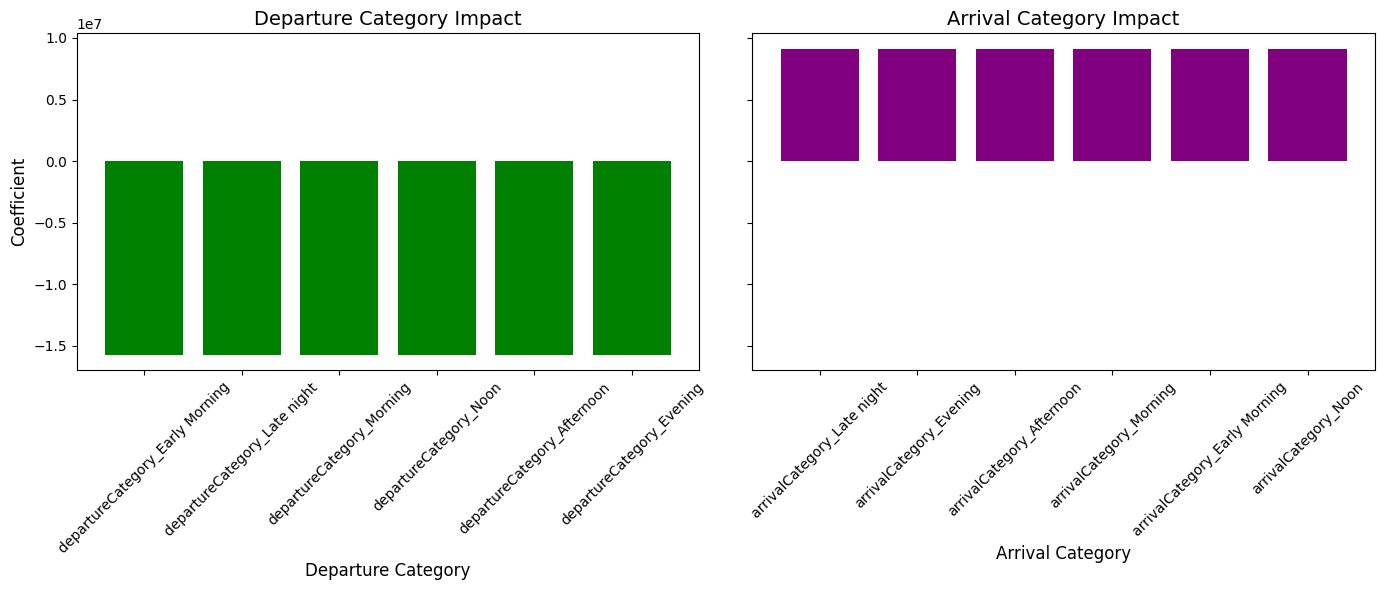

In [40]:
departure_features = coefficients[coefficients['Feature'].str.contains('departureCategory')]
arrival_features = coefficients[coefficients['Feature'].str.contains('arrivalCategory')]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

axes[0].bar(departure_features['Feature'], departure_features['Coefficient'], color='green')
axes[0].set_title('Departure Category Impact', fontsize=14)
axes[0].set_xlabel('Departure Category', fontsize=12)
axes[0].set_ylabel('Coefficient', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(arrival_features['Feature'], arrival_features['Coefficient'], color='purple')
axes[1].set_title('Arrival Category Impact', fontsize=14)
axes[1].set_xlabel('Arrival Category', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
Does flight duration (segmentsDurationInSeconds) correlate with higher fares?

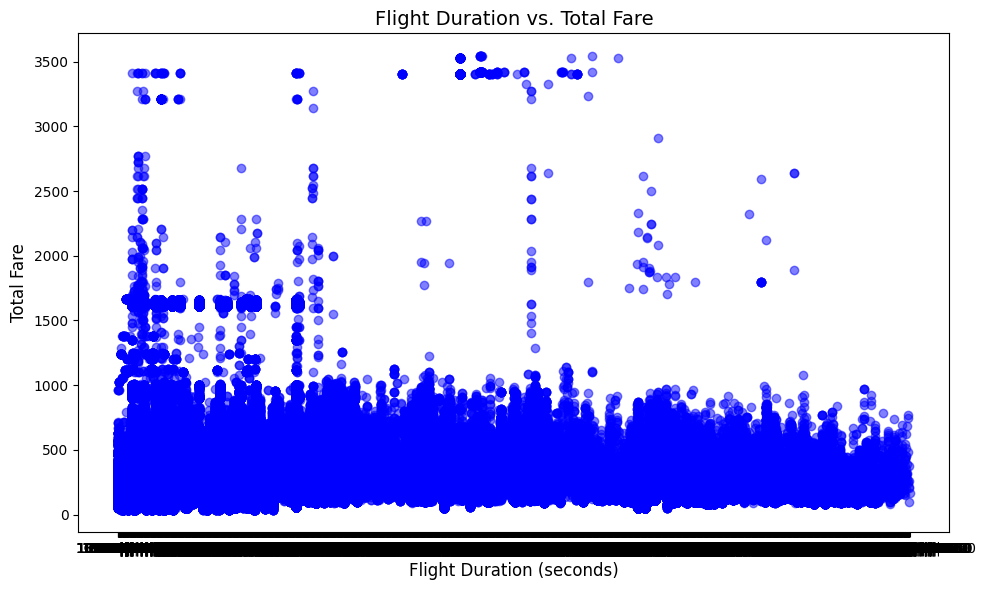

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['segmentsDurationInSeconds'], combined_df['totalFare'], alpha=0.5, color='blue')
plt.title('Flight Duration vs. Total Fare', fontsize=14)
plt.xlabel('Flight Duration (seconds)', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.tight_layout()
plt.show()


How does the booking window (elapsedDays) affect flight fares (totalFare) for flights departing from New York metro area airports?

/var/folders/4x/brsp5z3s5vddy1gyd3v5g93w0000gn/T/ipykernel_3398/2173371039.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ny_data['elapsedDays'].fillna(0, inplace=True)
/var/folders/4x/brsp5z3s5vddy1gyd3v5g93w0000gn/T/ipykernel_3398/2173371039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_data['elapsedDays'].fillna(0, inplace=Tru

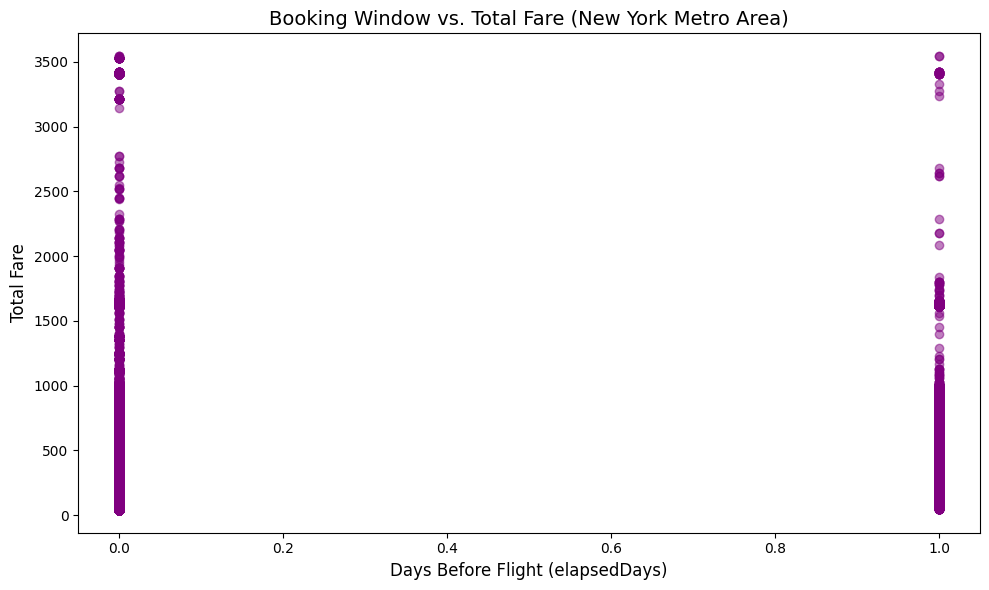

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

ny_data = combined_df[
    combined_df[['startingAirport_LGA', 'startingAirport_JFK', 'startingAirport_EWR']].sum(axis=1) > 0
]

ny_data['elapsedDays'].fillna(0, inplace=True)
ny_data['totalFare'].fillna(0, inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(ny_data['elapsedDays'], ny_data['totalFare'], alpha=0.5, color='purple')
plt.title('Booking Window vs. Total Fare (New York Metro Area)', fontsize=14)
plt.xlabel('Days Before Flight (elapsedDays)', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.tight_layout()
plt.show()



In [9]:
import pandas as pd


jetbluenew_df = pd.read_csv('../data/jetbluenew_df.csv')  
model_encoded = pd.read_csv('../data/model_encoded_jetblue_df.csv')  


combined_df = pd.concat([jetbluenew_df, model_encoded], axis=1)

print("Files loaded successfully!")
print("Combined DataFrame:")
print(combined_df.head())



Files loaded successfully!
Combined DataFrame:
   searchDate    route  flightDate startingAirport destinationAirport  \
0  2022-04-16  ATL|EWR  2022-04-17             ATL                EWR   
1  2022-04-16  ATL|JFK  2022-04-17             ATL                JFK   
2  2022-04-16  ATL|JFK  2022-04-17             ATL                JFK   
3  2022-04-16  ATL|LGA  2022-04-17             ATL                LGA   
4  2022-04-16  ATL|LGA  2022-04-17             ATL                LGA   

  travelDuration  elapsedDays  isBasicEconomy  isRefundable  isNonStop  ...  \
0         PT2H9M            0           False         False       True  ...   
1        PT2H15M            0           False         False       True  ...   
2        PT2H23M            0           False         False       True  ...   
3        PT2H16M            0           False         False       True  ...   
4        PT2H19M            0           False         False       True  ...   

   startingAirport_ORD  startingAirport


Model Performance:
Mean Squared Error (MSE): 17932.549806473755
R-squared (R²): 0.2917387260287867

Feature Coefficients:
               Feature   Coefficient
6             numStops  2.304775e+01
2  totalTravelDistance  9.305403e-02
3           searchDate  7.547337e-06
5             daysLeft -2.253915e-10
4           flightDate -1.261730e-05
1       seatsRemaining -9.276866e+00
0          elapsedDays -2.983702e+01


/var/folders/4x/brsp5z3s5vddy1gyd3v5g93w0000gn/T/ipykernel_72570/981150290.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='Blues_d')


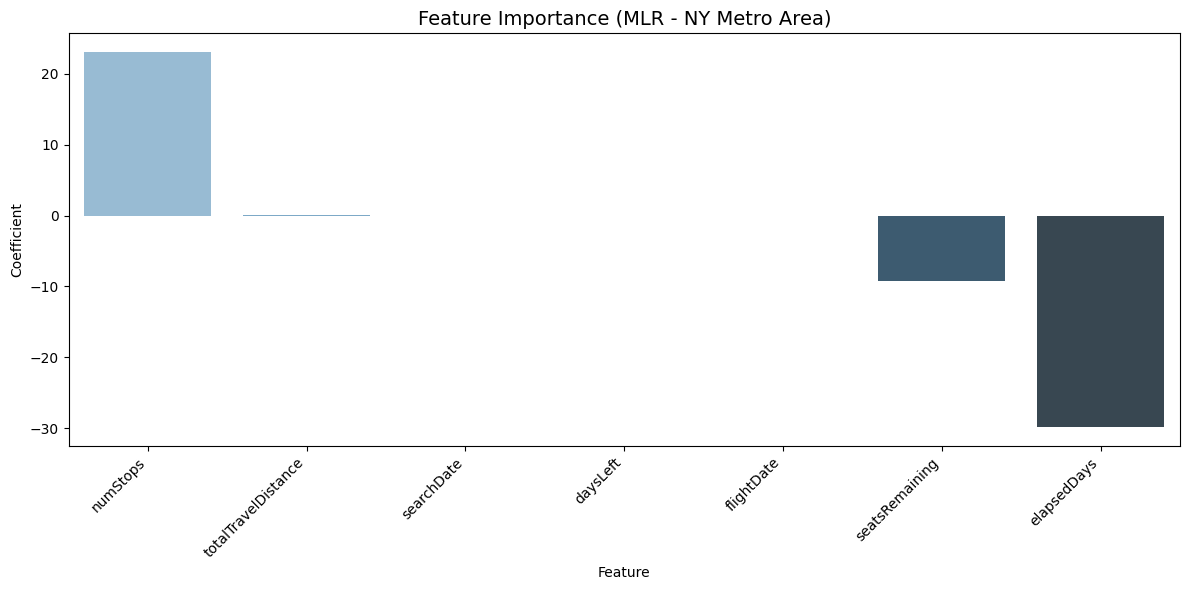

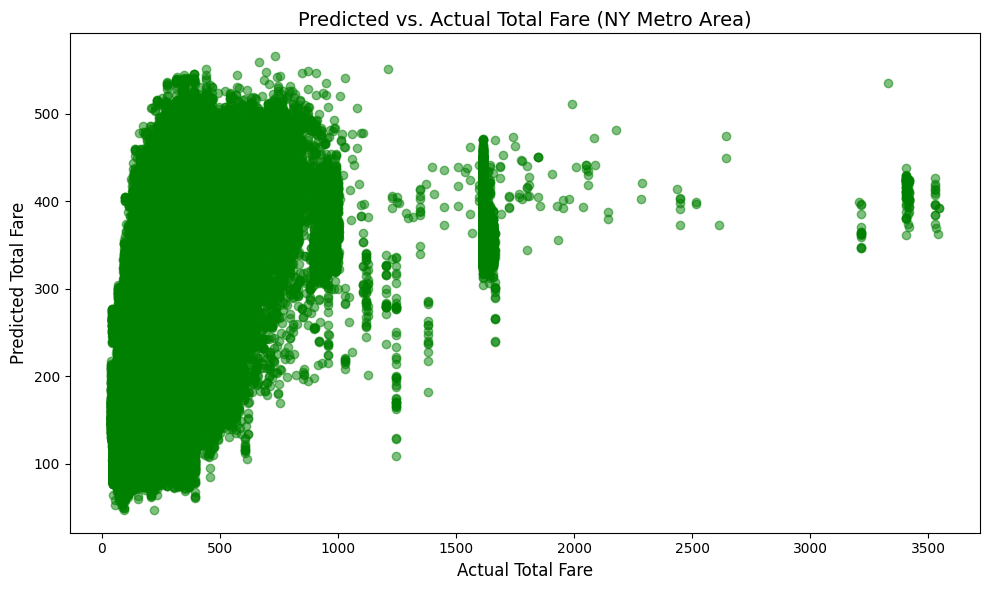

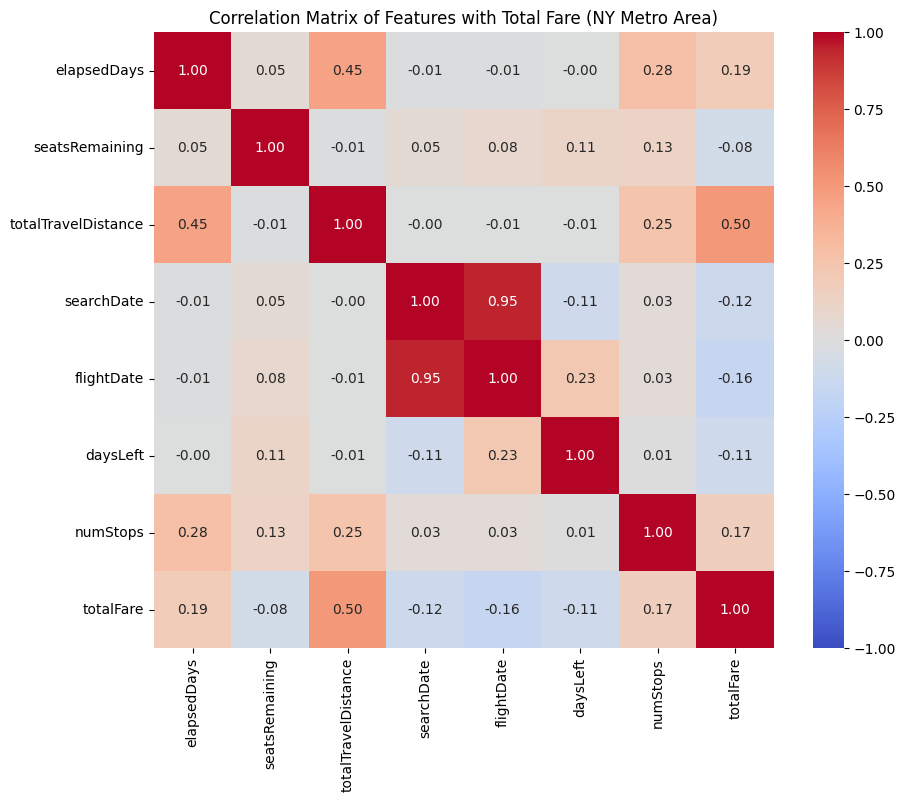

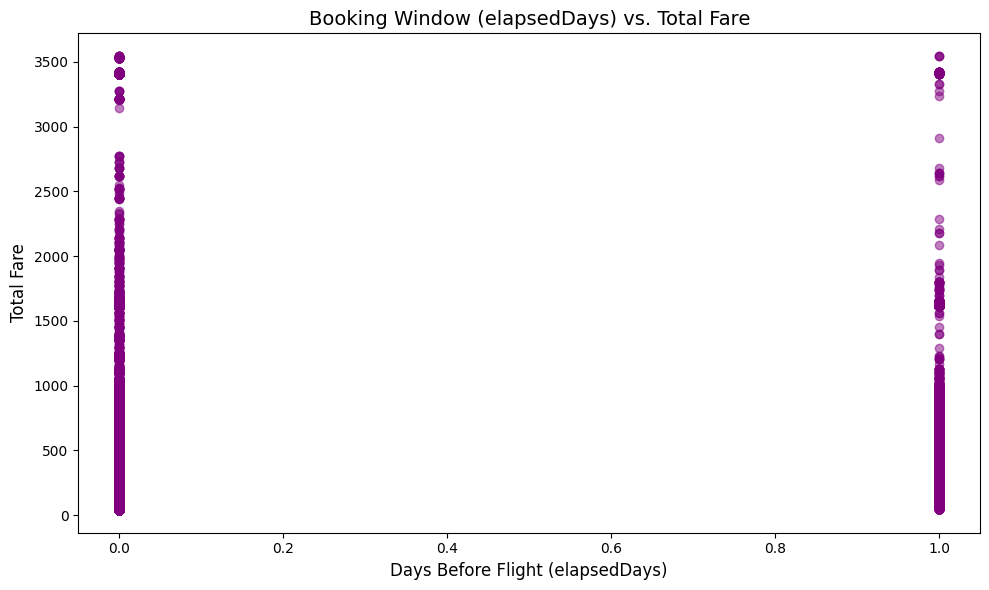

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


jetbluenew_df = pd.read_csv('../data/jetbluenew_df.csv')  
model_encoded = pd.read_csv('../data/model_encoded_jetblue_df.csv')

combined_df = pd.concat([jetbluenew_df, model_encoded], axis=1)

ny_features = ['elapsedDays', 'seatsRemaining', 'totalTravelDistance',
               'searchDate', 'flightDate', 'daysLeft', 'numStops', 'totalFare']


data_ny = combined_df[ny_features]


data_ny = data_ny.fillna(0)  


data_ny['searchDate'] = pd.to_datetime(data_ny['searchDate']).astype('int64') // 10**9
data_ny['flightDate'] = pd.to_datetime(data_ny['flightDate']).astype('int64') // 10**9


X = data_ny.drop(columns=['totalFare'])  
y = data_ny['totalFare']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)

# Visualization 1: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='Blues_d')
plt.title('Feature Importance (MLR - NY Metro Area)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.title('Predicted vs. Actual Total Fare (NY Metro Area)', fontsize=14)
plt.xlabel('Actual Total Fare', fontsize=12)
plt.ylabel('Predicted Total Fare', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 3: Correlation Matrix (Focused Features)
corr_matrix = data_ny.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with Total Fare (NY Metro Area)")
plt.show()

# Visualization 4: Booking Window vs. Total Fare
plt.figure(figsize=(10, 6))
plt.scatter(data_ny['elapsedDays'], data_ny['totalFare'], alpha=0.5, color='purple')
plt.title('Booking Window (elapsedDays) vs. Total Fare', fontsize=14)
plt.xlabel('Days Before Flight (elapsedDays)', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.tight_layout()
plt.show()




In [16]:
correlation_with_target = corr_matrix['totalFare'].sort_values(ascending=False)
print(correlation_with_target)


totalFare              1.000000
totalTravelDistance    0.504738
elapsedDays            0.189250
numStops               0.167086
seatsRemaining        -0.082564
daysLeft              -0.108159
searchDate            -0.124498
flightDate            -0.157518
Name: totalFare, dtype: float64



Model Performance:
Mean Squared Error (MSE): 18674.531434040826
R-squared (R²): 0.27380255090428784

Feature Coefficients:
               Feature   Coefficient
6             numStops  2.204125e+01
2  totalTravelDistance  9.175999e-02
3           searchDate  6.725736e-06
5             daysLeft -1.758160e-10
4           flightDate -1.157553e-05
1       seatsRemaining -8.416184e+00
0          elapsedDays -5.469060e+01


/var/folders/4x/brsp5z3s5vddy1gyd3v5g93w0000gn/T/ipykernel_72570/501258899.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='Blues_d')


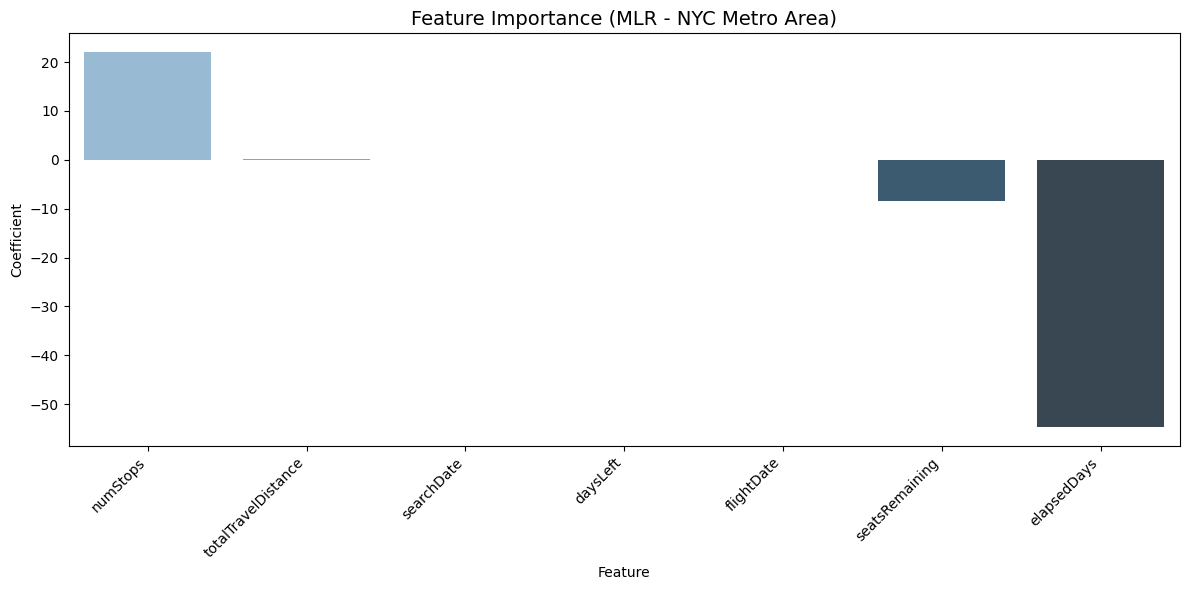

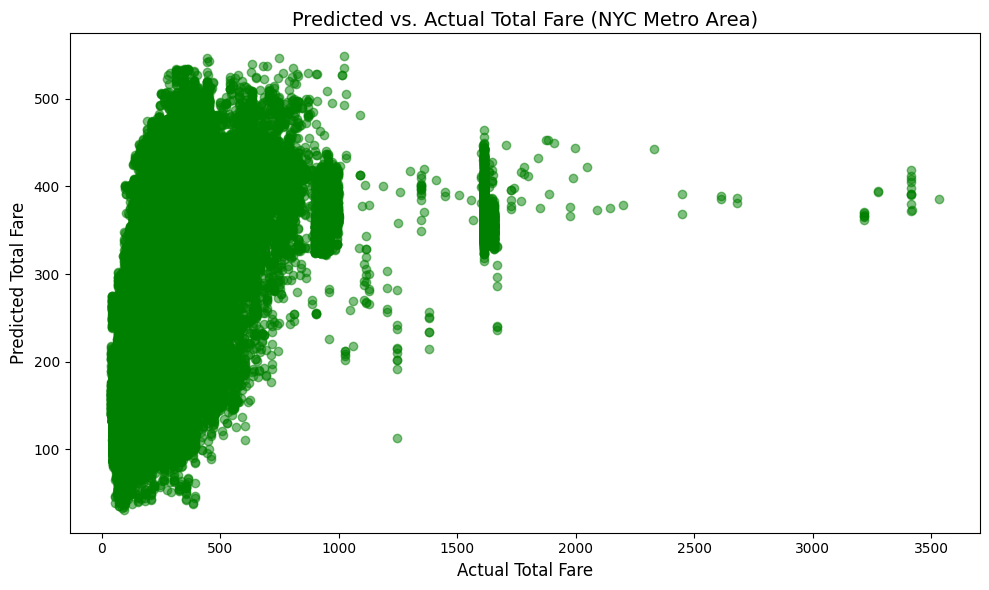

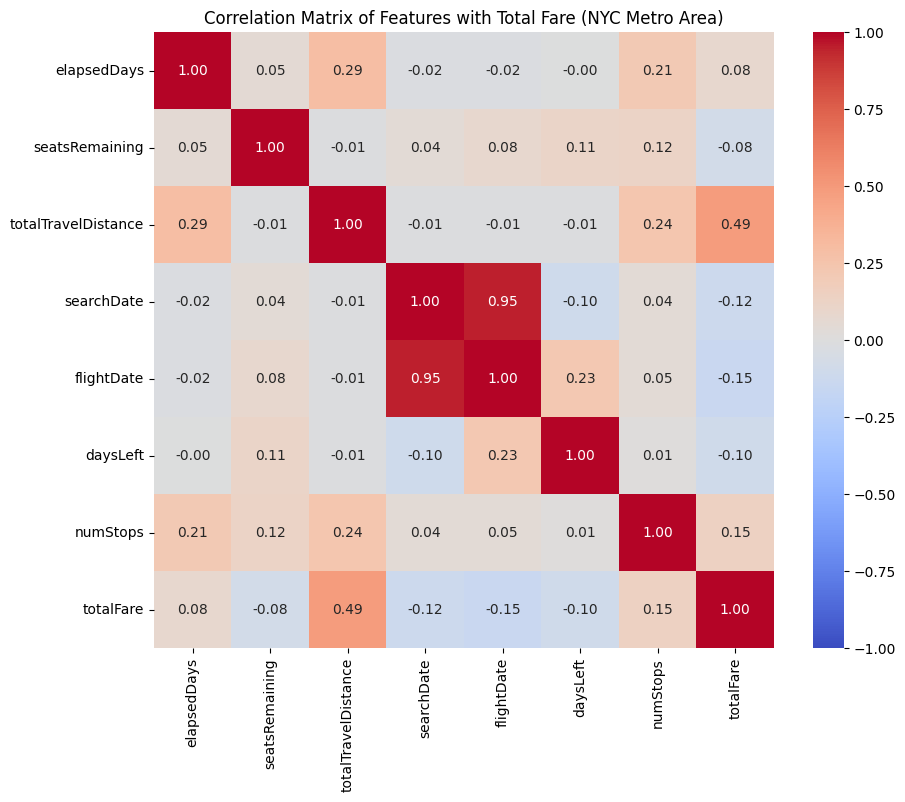

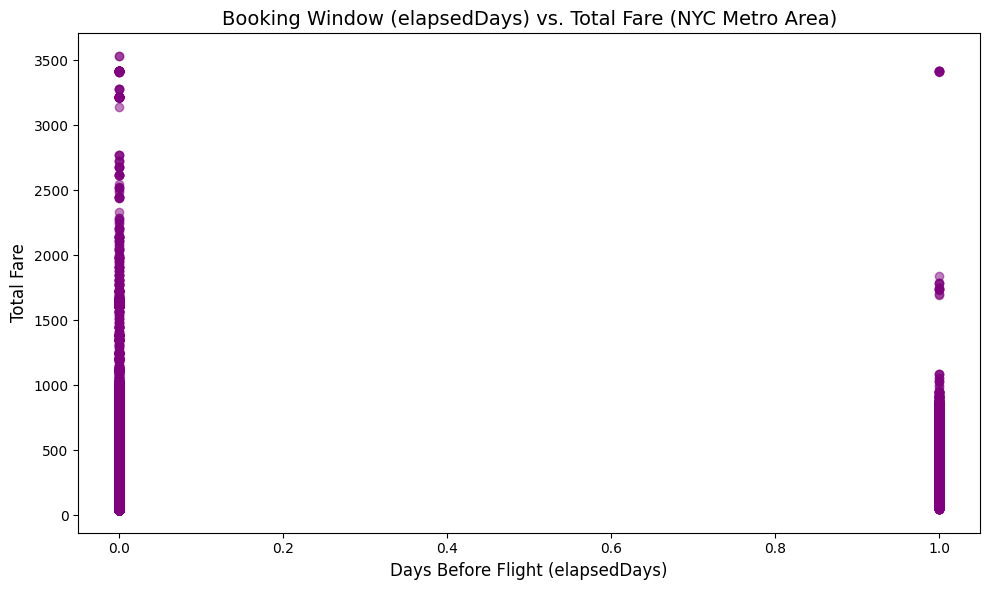

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


jetbluenew_df = pd.read_csv('../data/jetbluenew_df.csv')
model_encoded = pd.read_csv('../data/model_encoded_jetblue_df.csv')

combined_df = pd.concat([jetbluenew_df, model_encoded], axis=1)

nyc_airports = ['JFK', 'LGA', 'EWR']
combined_df = combined_df[combined_df['startingAirport'].isin(nyc_airports)]

ny_features = ['elapsedDays', 'seatsRemaining', 'totalTravelDistance',
               'searchDate', 'flightDate', 'daysLeft', 'numStops', 'totalFare']


data_ny = combined_df[ny_features]

data_ny = data_ny.fillna(0)  


data_ny['searchDate'] = pd.to_datetime(data_ny['searchDate']).astype('int64') // 10**9
data_ny['flightDate'] = pd.to_datetime(data_ny['flightDate']).astype('int64') // 10**9


X = data_ny.drop(columns=['totalFare'])  
y = data_ny['totalFare']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)

# Visualization 1: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='Blues_d')
plt.title('Feature Importance (MLR - NYC Metro Area)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.title('Predicted vs. Actual Total Fare (NYC Metro Area)', fontsize=14)
plt.xlabel('Actual Total Fare', fontsize=12)
plt.ylabel('Predicted Total Fare', fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 3: Correlation Matrix (Focused Features)
corr_matrix = data_ny.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with Total Fare (NYC Metro Area)")
plt.show()

# Visualization 4: Booking Window vs. Total Fare
plt.figure(figsize=(10, 6))
plt.scatter(data_ny['elapsedDays'], data_ny['totalFare'], alpha=0.5, color='purple')
plt.title('Booking Window (elapsedDays) vs. Total Fare (NYC Metro Area)', fontsize=14)
plt.xlabel('Days Before Flight (elapsedDays)', fontsize=12)
plt.ylabel('Total Fare', fontsize=12)
plt.tight_layout()
plt.show()


In [19]:
correlation_with_target = corr_matrix['totalFare'].sort_values(ascending=False)
print(correlation_with_target)

totalFare              1.000000
totalTravelDistance    0.488174
numStops               0.148263
elapsedDays            0.080932
seatsRemaining        -0.079934
daysLeft              -0.098741
searchDate            -0.118513
flightDate            -0.148418
Name: totalFare, dtype: float64
